In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve

In [18]:
# Load the dataset
data = pd.read_csv("cleaned_data.csv")

In [19]:
# Map 'Yes' to 1 and 'No' to 0 in the 'Heart_Stroke' column
data['Heart_Stroke'] = data['Heart_Stroke'].map({'Yes': 1, 'No': 0})

# Label encoding for the 'Gender' column
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Label encoding for binary categorical columns
label_encoder = LabelEncoder()
data['BPMeds'] = label_encoder.fit_transform(data['BPMeds'])
data['prevalentStroke'] = label_encoder.fit_transform(data['prevalentStroke'])
data['prevalentHyp'] = label_encoder.fit_transform(data['prevalentHyp'])

# One-hot encoding for the 'education' column
data = pd.get_dummies(data, columns=['education'], drop_first=True)

In [20]:
# Select features and target
X = data[['age', 'Gender', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
          'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

y = data['Heart_Stroke']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handle missing values
#data.dropna(inplace=True)  # This removes rows with missing values
# Re-split the data after handling missing values
X = data[['age', 'Gender', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
          'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = data['Heart_Stroke']

Missing Values:
Gender                     0
age                        0
currentSmoker              0
cigsPerDay                 0
BPMeds                     0
prevalentStroke            0
prevalentHyp               0
diabetes                   0
totChol                    0
sysBP                      0
diaBP                      0
BMI                        0
heartRate                  0
glucose                    0
Heart_Stroke               0
education_postgraduate     0
education_primaryschool    0
education_uneducated       0
dtype: int64


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Create and train the Logistic Regression model with hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Users\Shriganesh Lokapure\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shriganesh Lokapure\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

C:\Users\Shriganesh Lokapure\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Shriganesh Lokapure\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [25]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [26]:
# Create a Logistic Regression model with the best hyperparameters
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

C:\Users\Shriganesh Lokapure\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert accuracy to percentage
print(f"Accuracy: {accuracy:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob) * 100  # Convert ROC AUC to percentage
print(f"ROC AUC: {roc_auc:.2f}%")


Accuracy: 85.85%
ROC AUC: 73.83%


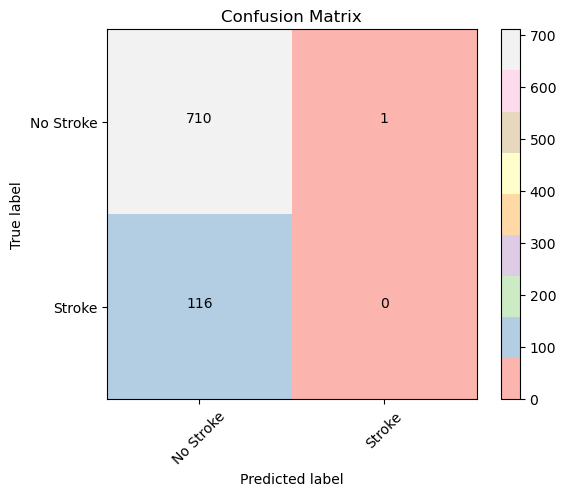

In [28]:
# Visualize the Confusion Matrix with values
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Pastel1)  # Change the colormap
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Stroke', 'Stroke'], rotation=45)
plt.yticks(tick_marks, ['No Stroke', 'Stroke'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Annotate the confusion matrix with values
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="black")

plt.show()

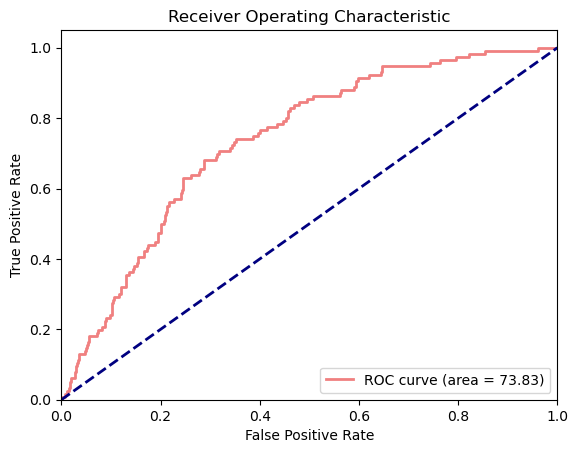

In [29]:
# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='lightcoral', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # Change the color to lightcoral
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

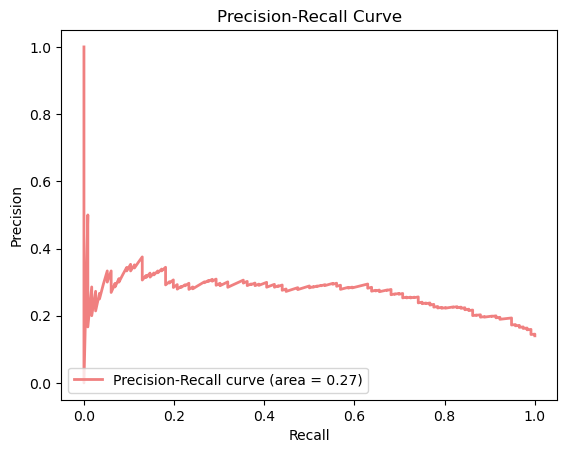

In [30]:
# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
area_under_curve = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='lightcoral', lw=2, label=f'Precision-Recall curve (area = {area_under_curve:.2f})')  # Change the color to lightcoral
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

Text(0.5, 1.0, 'Feature Importance in Logistic Regression')

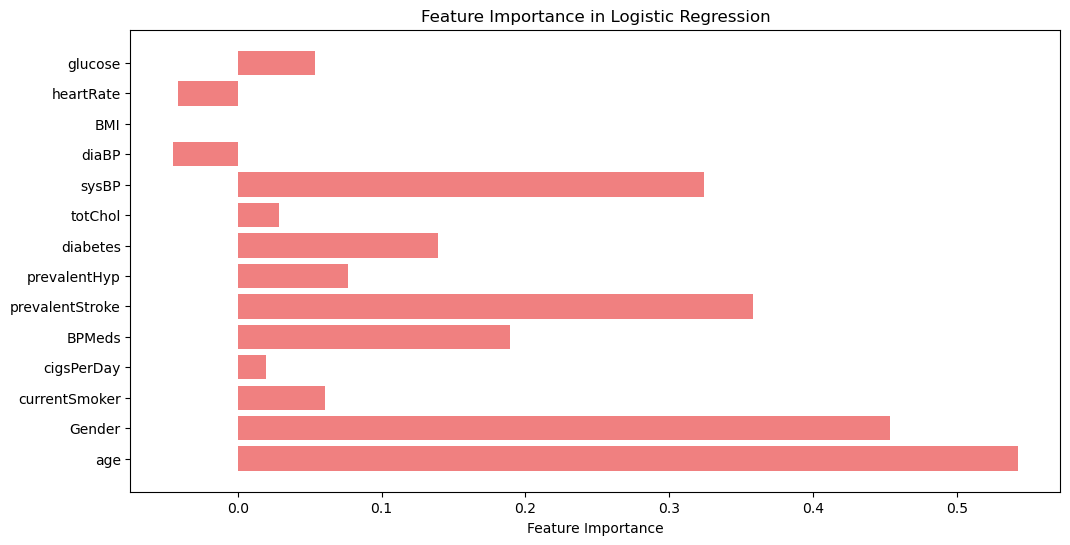

In [31]:
# 4. Feature Importance
coef = model.coef_[0]
feature_names = X.columns
plt.figure(figsize=(12, 6))
plt.barh(range(len(coef)), coef, color='lightcoral', tick_label=feature_names)  # Change the color to lightcoral
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Logistic Regression')

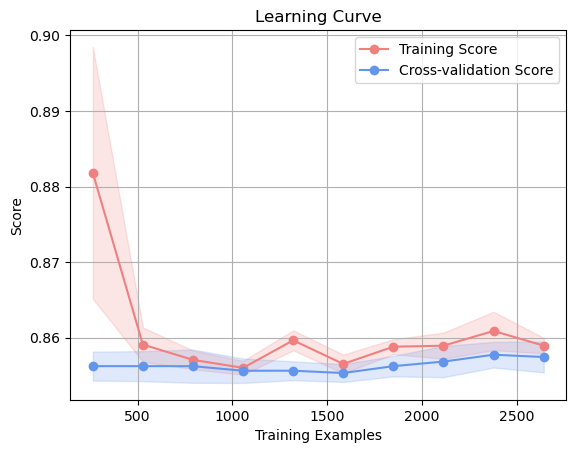

In [32]:
# 5. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()

# Fill area with a different color and light shade
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='lightcoral')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='cornflowerblue')

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score', color='lightcoral')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation Score', color='cornflowerblue')
plt.legend(loc='best')

In [33]:
# Print best hyperparameters and accuracy
print("Best Hyperparameters:")
print(f"   C: {best_params['C']:.2f}")
print(f"   penalty: {best_params['penalty']}")
print(f"Accuracy: {accuracy:.2f}%")

Best Hyperparameters:
   C: 0.10
   penalty: l2
Accuracy: 85.85%
